In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv()

True

## `What is Embeddings?`
Think of embedding as a way  to translate words into a language that computers understand - number


In [50]:
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

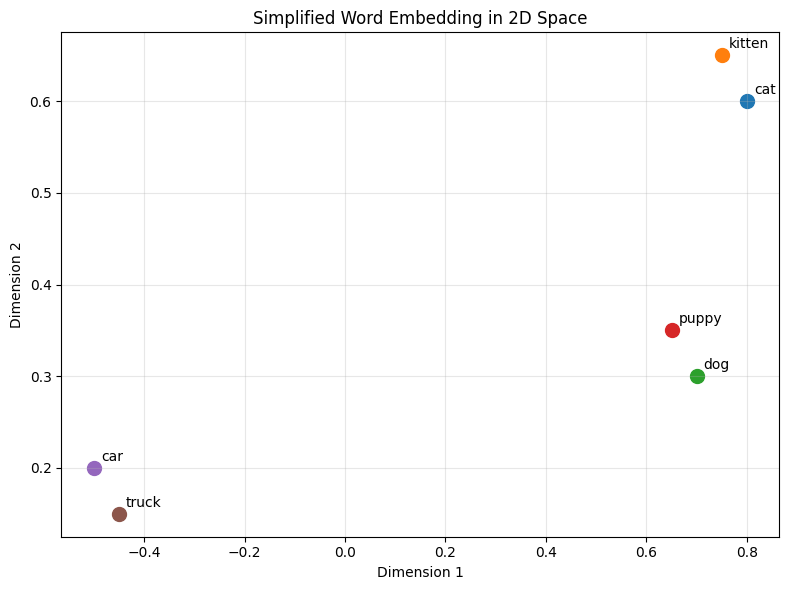

In [54]:
fig, ax = plt.subplots(figsize = (8,6))
for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s =100)
    ax.annotate(word, (coords[0], coords[1]), xytext =(5,5),
               textcoords = 'offset points')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Simplified Word Embedding in 2D Space")
ax.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [149]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)
    

In [61]:
# Use Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]


cat_kitten_similarity = cosine_similarity(cat_vector, kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [63]:
cosine_similarity(cat_vector, car_vector)

np.float64(-0.43718588548916804)

# Embeddig with Huggingface and OpenAI

In [94]:
import os
os.environ.pop("HUGGINGFACEHUB_API_TOKEN", None)

In [98]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings =HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [100]:
## Create embedding sample # `embed_query` is used for one sentence
text = "Hello, I am learning about embedding"
embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length: {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embedding
Embedding length: 384
[-0.012541021220386028, -0.08428976684808731, -0.003736011451110244, -0.0036944840103387833, 0.029054399579763412, 0.061269763857126236, 0.012031006626784801, 0.017726929858326912, 0.04343545809388161, -0.028131818398833275, 0.02011863887310028, 0.07650147378444672, 0.045305728912353516, 0.0022559911012649536, -0.05790175497531891, 0.014729894697666168, 0.052186448127031326, 0.05656284838914871, -0.09237099438905716, -0.02778216265141964, -0.028742702677845955, -0.05491914600133896, 0.011186933144927025, -0.10679484158754349, 0.013341332785785198, -0.01886415109038353, -0.0051790750585496426, 0.07339488714933395, 0.10817254334688187, -0.07271407544612885, 0.05805009976029396, -0.03648953139781952, -0.0010906701209023595, 0.0577571839094162, -0.07553373277187347, 0.11141461133956909, 0.02548898197710514, -0.013313240371644497, -0.07460542023181915, -0.010939469560980797, 0.01912962831556797, 0.01431373693048954, -0.0235723

In [106]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]
embedd_sentence = embeddings.embed_documents(sentences)
print(len(embedd_sentence))
print(embedd_sentence[0][:20])

5
[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656]


In [112]:
import time
# Populer models

models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")

for model_name, info in models.items():
    print(f"Model name -> {model_name}")
    print(f"Embedding size: {info['size']} dimensions")
    print(f"Descrinption : {info['description']}" )
    print(f"Use case  : {info['use_case']}\n" )

📊 Popular Open Source Embedding Models:

Model name -> all-MiniLM-L6-v2
Embedding size: 384 dimensions
Descrinption : Fast and efficient, good quality
Use case  : General purpose, real-time applications

Model name -> all-mpnet-base-v2
Embedding size: 768 dimensions
Descrinption : Best quality, slower than MiniLM
Use case  : When quality matters more than speed

Model name -> all-MiniLM-L12-v2
Embedding size: 384 dimensions
Descrinption : Slightly better than L6, bit slower
Use case  : Good balance of speed and quality

Model name -> multi-qa-MiniLM-L6-cos-v1
Embedding size: 384 dimensions
Descrinption : Optimized for question-answering
Use case  : Q&A systems, semantic search

Model name -> paraphrase-multilingual-MiniLM-L12-v2
Embedding size: 384 dimensions
Descrinption : Supports 50+ languages
Use case  : Multilingual applications



# Open AI Embedding

In [72]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [117]:
from langchain_openai import OpenAIEmbeddings
emb = OpenAIEmbeddings(model = "text-embedding-3-small")

In [119]:
emb

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x0000020F3FC62B70>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x0000020F3FB71E50>, model='text-embedding-3-small', dimensions=None, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [123]:
# Single text Embedding
single_text  = "langain and Rag are amazing frameworks and projects to work on"
single_emb = emb.embed_query(single_text)
print(len(single_emb))
print(single_emb)


1536
[-0.05295361205935478, -0.013203343376517296, 0.003947680350393057, -0.02633656933903694, 0.0343300960958004, -0.058226533234119415, -0.012284789234399796, -0.0041930959559977055, -0.010223300196230412, -0.023293418809771538, 0.009262674488127232, -0.03399352729320526, -0.025256741791963577, 0.01425512321293354, 0.015440128743648529, 0.014514562673866749, 0.011331175453960896, -0.06619201600551605, 0.027935273945331573, 0.05895576998591423, 0.02486407570540905, -0.014766989275813103, -0.022409923374652863, 0.01050377544015646, -0.004995954688638449, -0.031329017132520676, -0.010258359834551811, 0.07595252990722656, 0.020390506833791733, -0.026154259219765663, 0.02089536003768444, -0.029281552881002426, -0.010097087360918522, 0.02647680602967739, 0.00027346276328898966, 0.0206289105117321, 0.01507551223039627, -0.006058251950889826, -0.008463322184979916, 0.02684142254292965, -0.025831714272499084, 0.0190021563321352, 0.014192016795277596, -0.0058128368109464645, 0.0256073344498872

In [127]:
# Example 2: Multiple texts at once
multiple_texts = [
    "Python is a programming language",
    "LangChain is a framework for LLM applications",
    "Embeddings convert text to numbers",
    "Vectors can be compared for similarity"
]

In [131]:
multiple_emb = emb.embed_documents(multiple_texts)
len(multiple_emb[0])

1536

In [133]:
from langchain_openai import OpenAIEmbeddings

# Different OpenAI embedding models
models_comparison = {
    "text-embedding-3-small": {
        "dimensions": 1536,
        "description": "Good balance of performance and cost",
        "cost_per_1m_tokens": 0.02,
        "use_case": "General purpose, cost-effective"
    },
    "text-embedding-3-large": {
        "dimensions": 3072,
        "description": "Highest quality embeddings",
        "cost_per_1m_tokens": 0.13,
        "use_case": "When accuracy is critical"
    },
    "text-embedding-ada-002": {
        "dimensions": 1536,
        "description": "Previous generation model",
        "cost_per_1m_tokens": 0.10,
        "use_case": "Legacy applications"
    }
}

# Display comparison
print("📊 OpenAI Embedding Models Comparison:\n")
for model_name, details in models_comparison.items():
    print(f"Model: {model_name}")
    print(f"  📏 Dimensions: {details['dimensions']}")
    print(f"  💰 Cost: ${details['cost_per_1m_tokens']}/1M tokens")
    print(f"  📝 Description: {details['description']}")
    print(f"  🎯 Use case: {details['use_case']}\n")

📊 OpenAI Embedding Models Comparison:

Model: text-embedding-3-small
  📏 Dimensions: 1536
  💰 Cost: $0.02/1M tokens
  📝 Description: Good balance of performance and cost
  🎯 Use case: General purpose, cost-effective

Model: text-embedding-3-large
  📏 Dimensions: 3072
  💰 Cost: $0.13/1M tokens
  📝 Description: Highest quality embeddings
  🎯 Use case: When accuracy is critical

Model: text-embedding-ada-002
  📏 Dimensions: 1536
  💰 Cost: $0.1/1M tokens
  📝 Description: Previous generation model
  🎯 Use case: Legacy applications



# Cosine Similarity  With Open AI Embedding

In [144]:
sentences = [
    "The cat sat on the mat",
    "A feline rested on the rug",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

In [146]:
emb1 = emb.embed_documents(sentences)


In [151]:
## Calculate the similarity between all pairs

for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        similarity = cosine_similarity(emb1[i], emb1[j])

        print(f"'{sentences[i]}' vs '{sentences[j]}' ")
        print(f"Similarity: {similarity: .3f}\n")

'The cat sat on the mat' vs 'A feline rested on the rug' 
Similarity:  0.655

'The cat sat on the mat' vs 'The dog played in the yard' 
Similarity:  0.324

'The cat sat on the mat' vs 'I love programming in Python' 
Similarity:  0.089

'The cat sat on the mat' vs 'Python is my favorite programming language' 
Similarity:  0.120

'A feline rested on the rug' vs 'The dog played in the yard' 
Similarity:  0.296

'A feline rested on the rug' vs 'I love programming in Python' 
Similarity:  0.055

'A feline rested on the rug' vs 'Python is my favorite programming language' 
Similarity:  0.103

'The dog played in the yard' vs 'I love programming in Python' 
Similarity:  0.126

'The dog played in the yard' vs 'Python is my favorite programming language' 
Similarity:  0.085

'I love programming in Python' vs 'Python is my favorite programming language' 
Similarity:  0.708



# Example - Semantic Search -Retrieve the similar sentence

In [163]:
# Test semantic search
documents = [
    "LangChain is a framework for developing applications powered by language models",
    "Python is a high-level programming language",
    "Machine learning is a subset of artificial intelligence",
    "Embeddings convert text into numerical vectors",
    "The weather today is sunny and warm"
]

query = "what is langchain"

In [201]:
def semantic_search(query, documents, embedding_model, top_k=5):
    """ Simple semantic search implementation"""
    # Embedding query and documents
    query_emb = embedding_model.embed_query(query)
    doc_emb = embedding_model.embed_documents(documents)
    # Calculate the similarity score
    similarities =[]
    for i, doc_emb in enumerate(doc_emb):
        similarity = cosine_similarity(query_emb, doc_emb)
        similarities.append((similarity, documents[i]))
    ## Sort by similarity
    similarities.sort(reverse=True)
    return similarities[:top_k]

In [175]:
results= semantic_search(query, documents, emb)
results

[(np.float64(0.6363226340406792),
  'LangChain is a framework for developing applications powered by language models'),
 (np.float64(0.16929754738909908),
  'Python is a high-level programming language'),
 (np.float64(0.1093403995024466),
  'Embeddings convert text into numerical vectors')]

In [177]:
print(f"\n🔎 Semantic Search Results for: '{query}'")
for score, doc in results:
    print(f"Score: {score:.3f} | {doc}")
    


🔎 Semantic Search Results for: 'what is langchain'
Score: 0.636 | LangChain is a framework for developing applications powered by language models
Score: 0.169 | Python is a high-level programming language
Score: 0.109 | Embeddings convert text into numerical vectors


In [183]:
query1 = "What is Embeddings"
results = semantic_search(query1, documents, emb)
for score, doc in results:
    print(f"Score{score:.3f} || {doc}")

Score0.610 || Embeddings convert text into numerical vectors
Score0.234 || LangChain is a framework for developing applications powered by language models
Score0.232 || Machine learning is a subset of artificial intelligence


In [205]:
doc = [
    "O'zbekiston poytaxti toshkent go'zal diyor",
    "Toshkent yashash juda yaxshi",
    "Men O'zbekistonda yaxshi ko'raman",
    "Men vatanimni sevaman"
]

query2  = "Men vatanimni sevaman"

In [207]:
results = semantic_search(query2, doc, emb)
for score, doc in results:
    print(f"Score{score:.3f} || {doc}")

Score1.000 || Men vatanimni sevaman
Score0.328 || Men O'zbekistonda yaxshi ko'raman
Score0.199 || Toshkent yashash juda yaxshi
Score0.175 || O'zbekiston poytaxti toshkent go'zal diyor


In [215]:
doc2 = [
    "O‘zbekistonning poytaxti Toshkent shahri bo‘lib, u mamlakatning iqtisodiy va madaniy markazi hisoblanadi.",
   " Toshkentda ko‘plab muzeylar, teatrlar va zamonaviy infratuzilma mavjud."
]

query3  = "Toshkent shahrida qanday madaniy joylar bor?"

In [217]:
results = semantic_search(query3, doc2, emb)
for score, doc in results:
    print(f"Score{score:.3f} || {doc}")

Score0.618 || O‘zbekistonning poytaxti Toshkent shahri bo‘lib, u mamlakatning iqtisodiy va madaniy markazi hisoblanadi.
Score0.512 ||  Toshkentda ko‘plab muzeylar, teatrlar va zamonaviy infratuzilma mavjud.


In [ ]:
def detect_outliers(file_paths, save_path, contamination=0.2):
    os.makedirs(save_path, exist_ok=True)
    
    dataset = PKDniftiDataset(file_paths=file_paths, transformation=transform_3d)
    # Set shuffle=False to ensure deterministic order for file path matching
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

    sample_img, _, _ = dataset[0]
    in_channels = sample_img.shape[0]
    
    # Initialize the encoder model
    encoder = Autoencoder3D(in_channels=in_channels).get_encoder()
    
    # Load or train the autoencoder
    try:
        encoder.load_state_dict(torch.load('logs/nifti/model/encoder_state_dict.pth'))
        print("Loaded pre-trained encoder state dictionary.")
    except FileNotFoundError:
        print("Pre-trained encoder state dictionary not found. Training new autoencoder.")
        train_autoencoder(dataset)
        # Load the newly trained encoder
        encoder.load_state_dict(torch.load('logs/nifti/model/encoder_state_dict.pth'))
        
    encoder.to(device).eval()

    latent_features = []
    file_info = [] 
    with torch.no_grad():
        for batch_idx, (images, _, class_names) in enumerate(dataloader):
            images = images.to(device)
            features = encoder(images)
            features = features.view(features.size(0), -1).cpu().numpy()
            latent_features.append(features)
            
            start_idx = batch_idx * dataloader.batch_size
            end_idx = start_idx + images.size(0)
            
            for i in range(start_idx, end_idx):
                original_path = dataset.img_data[i]
                original_class = dataset.get_class(original_path)
                file_info.append((original_path, original_class))
            
            torch.cuda.empty_cache()
            
    latent_features = np.concatenate(latent_features, axis=0)
    print(f"Shape of latent_features: {latent_features.shape}")
    print("Applying t-SNE for visualization...")
    tsne = TSNE(n_components=3, perplexity=30, learning_rate='auto', init='pca', random_state=42)
    tsne_features = tsne.fit_transform(latent_features)
    print(f"Shape after t-SNE: {tsne_features.shape}")
    
    print("t-SNE finished.")
    
    # Isolation Forest for outlier detection
    print("Isolation Forest progress is starting...")
    clf = IsolationForest(max_samples='auto', contamination=contamination, random_state=42)
    labels = clf.fit_predict(tsne_features) # Use the reduced features for detection
    
    outlier_indices = [i for i, label in enumerate(labels) if label == -1]
    
    print(f"Number of outliers detected: {len(outlier_indices)}")
    
    # Plotting the results
    fig = plt.figure(figsize=(12, 5))
    
    # 2D plot (first two components)
    ax1 = fig.add_subplot(121)
    ax1.scatter(tsne_features[:, 0], tsne_features[:, 1], c='blue', label='Inliers')
    ax1.scatter(tsne_features[outlier_indices, 0], tsne_features[outlier_indices, 1], c='red', label='Outliers', s=100)
    ax1.set_title("t-SNE 2D (Comp 1 vs 2)")
    ax1.set_xlabel("t-SNE Component 1")
    ax1.set_ylabel("t-SNE Component 2")
    ax1.legend()
    ax1.grid(True)
    
    # 3D plot (all three components)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(tsne_features[:, 0], tsne_features[:, 1], tsne_features[:, 2], c='blue', label='Inliers', alpha=0.6)
    ax2.scatter(tsne_features[outlier_indices, 0], tsne_features[outlier_indices, 1], 
                tsne_features[outlier_indices, 2], c='red', label='Outliers', s=100)
    ax2.set_title("t-SNE 3D (Comp 1, 2, 3)")
    ax2.set_xlabel("t-SNE Component 1")
    ax2.set_ylabel("t-SNE Component 2")
    ax2.set_zlabel("t-SNE Component 3")
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, 'tsne_3d_plot.png'))
    plt.show()

    # Save outliers with original filenames inside class-named subfolders
    if not outlier_indices:
        print("No outliers detected to save.")
    else:
        for idx in outlier_indices:
            src_path, class_name = file_info[idx]
            original_filename = os.path.basename(src_path)
            
            class_save_path = os.path.join(save_path, class_name)
            os.makedirs(class_save_path, exist_ok=True)
            
            dst_path = os.path.join(class_save_path, original_filename)
            shutil.copy(src_path, dst_path)
            print(f"Saved outlier image: {dst_path}")

    return outlier_indices